---
# **Exercise: Imbalanced data**
---

**Case Study** `Car Insurance Claim`

You work as a data scientist at an insurance company. You are asked to predict
whether a potential customer will file a claim when they have insurance with your company.

- Dataset: Car_Insurance_Claim.csv
- Target: 'OUTCOME'
- 0: no claim filed
- 1: filed a claim


**Instructions**

1. Define FP and FN in this car insurance case. Which error do you think has a higher cost (FP or FN)? Use evaluation metrics appropriate to your business needs!
1. Perform data cleaning if necessary!
1. Perform a brief EDA to understand the dataset you are using!
1. Perform data splitting!
1. Perform preprocessing/feature engineering as needed!
1. Perform cross-validation using several ML algorithms you have mastered. Choose the best algorithm for the final modeling!
1. Perform hyperparameter tuning on the selected model (from cross-validation). Choose the best hyperparameters for the final modeling!
1. Compare the model performance before and after hyperparameter tuning. Did the performance improve?
- Model before before hyperparameter tuning
- Model after after hyperparameter tuning

In [1]:
# Installing additional library
#!pip install category_encoders

In [2]:
# Initial setup

# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# Integrating data Preprocessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# encoder and scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# resampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# cross validation to find best algorithms
from sklearn.model_selection import cross_val_score, StratifiedKFold

# metrics for regression
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve

# ggplot style
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

**Loading dataset**



In [3]:
# Loading dataset
Car_Insurance_Claim_csv = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/Car_Insurance_Claim.csv'
df = pd.read_csv(Car_Insurance_Claim_csv)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## **Data Understanding**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [5]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [6]:
df['POSTAL_CODE'].value_counts()
# should be encoded

POSTAL_CODE
10238    6940
32765    2456
92101     484
21217     120
Name: count, dtype: int64

In [7]:
df.describe(include='object')

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


### **Exploratory Data Analysis**

In [8]:
# unique values in categorical columns

for i in df.describe(include='object').columns:
    print(i, '\n', df[i].unique(), '\n')

AGE 
 ['65+' '16-25' '26-39' '40-64'] 

GENDER 
 ['female' 'male'] 

RACE 
 ['majority' 'minority'] 

DRIVING_EXPERIENCE 
 ['0-9y' '10-19y' '20-29y' '30y+'] 

EDUCATION 
 ['high school' 'none' 'university'] 

INCOME 
 ['upper class' 'poverty' 'working class' 'middle class'] 

VEHICLE_YEAR 
 ['after 2015' 'before 2015'] 

VEHICLE_TYPE 
 ['sedan' 'sports car'] 



In [9]:
# missing values

df.isna().sum().to_frame('missing values')

,missing values
ID,0
AGE,0
GENDER,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,982
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0


In [10]:
# duplicates
print('number of duplicates:', df.duplicated().sum())

number of duplicates: 0


**Correlation**

In [11]:
df.select_dtypes(['int', 'float']).corr()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


In [12]:
df['MARRIED'].value_counts()
# Data is quite balanced

MARRIED
0.0    5018
1.0    4982
Name: count, dtype: int64

In [13]:
df['MARRIED'].sort_values()

0       0.0
4151    0.0
4150    0.0
4149    0.0
7958    0.0
       ... 
4485    1.0
4484    1.0
4483    1.0
4499    1.0
9999    1.0
Name: MARRIED, Length: 10000, dtype: float64

In [14]:
# What value will be entered on simpleimputer
df[df['MARRIED']==1]['ANNUAL_MILEAGE'].median()

10000.0

In [15]:
df['ANNUAL_MILEAGE'].median()

12000.0

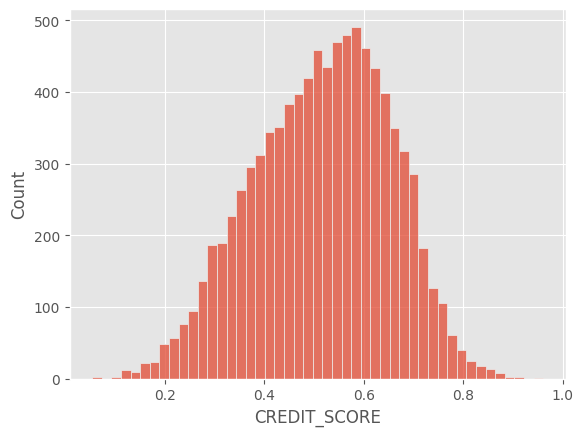

In [16]:
sns.histplot(data=df, x='CREDIT_SCORE')
plt.show()

In [17]:
print(df['CREDIT_SCORE'].mean())
print(df['CREDIT_SCORE'].median())

0.515812809602791
0.5250327586154788


<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

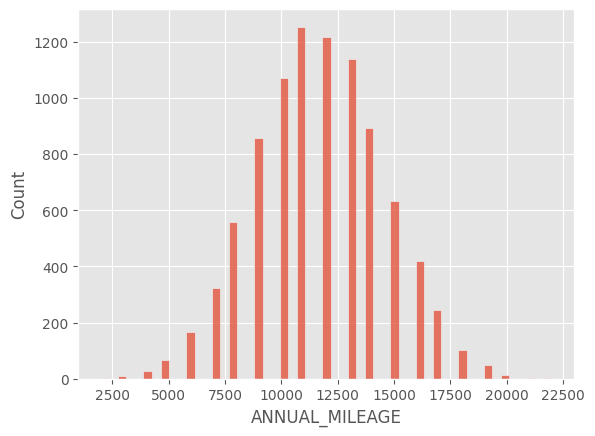

In [18]:
sns.histplot(data=df, x='ANNUAL_MILEAGE')

In [19]:
print(df['ANNUAL_MILEAGE'].mean())
print(df['ANNUAL_MILEAGE'].median())
print(df['ANNUAL_MILEAGE'].mode()[0])

11697.003206900365
12000.0
11000.0


In [20]:
# Outcome
df['OUTCOME'].value_counts()

# mild imbalance data

OUTCOME
0.0    6867
1.0    3133
Name: count, dtype: int64

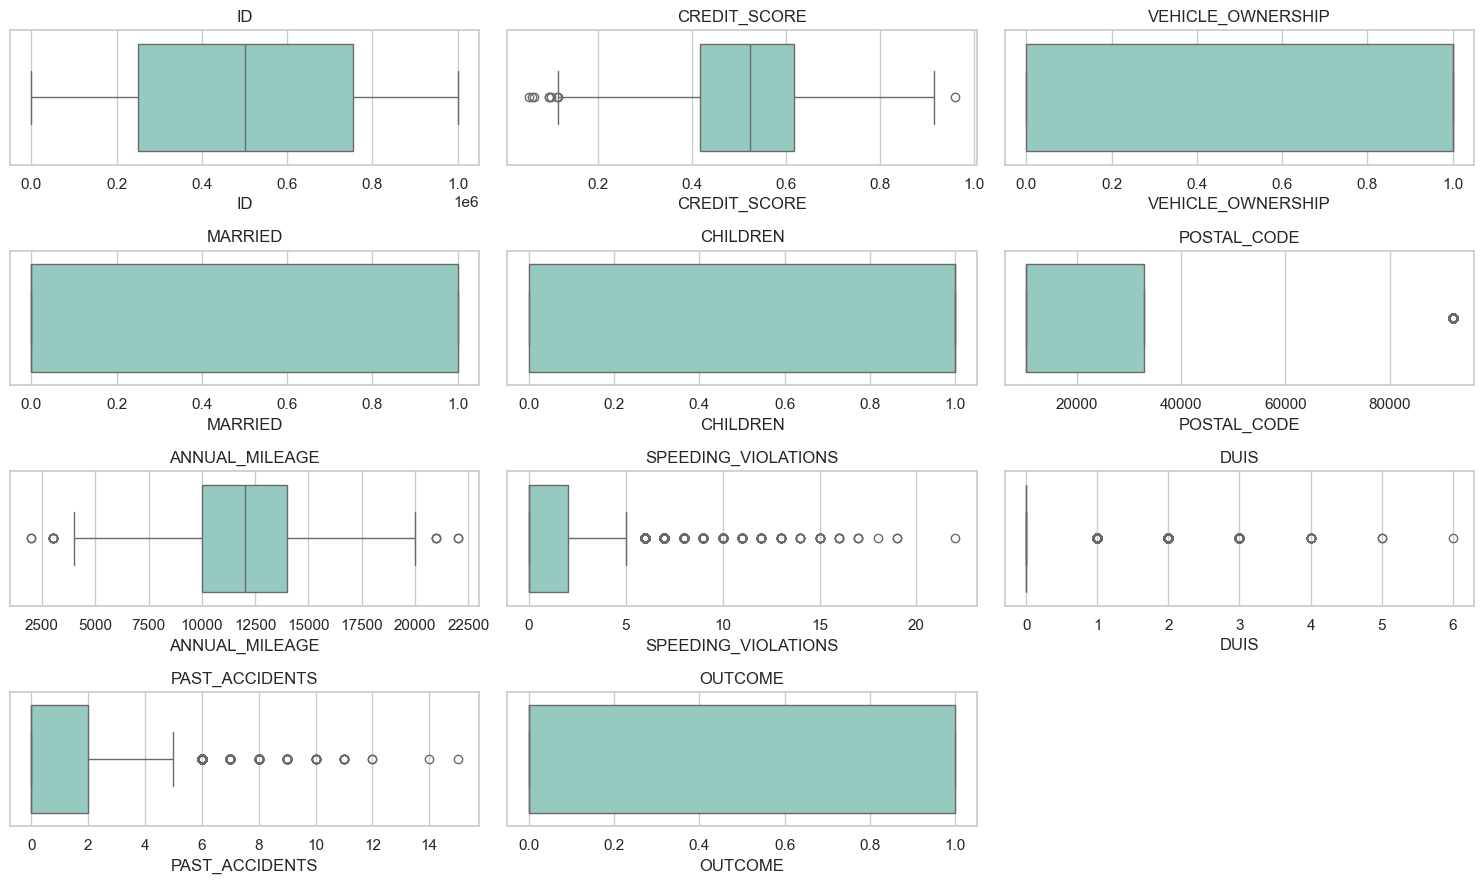

In [21]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

**Define feature X and target**

In [22]:
# Define X and y
X = df.drop(columns=['OUTCOME','ID'])
y = df['OUTCOME']

**Data splitting**

In [23]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

**Prepocessing**

## **Data Preprocessing**

Impute
- Median:
    - 'CREDIT_SCORE'
    - 'ANNUAL_MILEAGE'

Encode:
- Ordinal Encoder:
    - 'AGE'
    - 'DRIVING_EXPERIENCE'
    - 'EDUCATION'
    - 'INCOME'
- One Hot Encoder:
    - 'GENDER'
    - 'RACE'
    - 'VEHICLE_YEAR'
    - 'VEHICLE_TYPE'

Scaler:
- MinMax
- Standard
- Robust

In [24]:
X.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')

In [25]:
# Setting mapping

# ordinal mapping 1
ordinal_mapping1 = [
    {'col':'AGE', 'mapping':{'16-25':20, '26-39':33, '40-64':47, '65+':70, None:0}},
    {'col':'DRIVING_EXPERIENCE', 'mapping':{'0-9y':5, '10-19y':15, '20-29y':25 , '30y+':35, None:0}},
    {'col':'EDUCATION', 'mapping':{'high school':12, 'university':16, 'none':0, None:0}},
    {'col':'INCOME', 'mapping':{'poverty':1, 'working class':2, 'middle class':3, 'upper class':4, None:0}}
]

# ordinal mapping 2
ordinal_mapping2 = [
    {'col':'AGE', 'mapping':{'16-25':1, '26-39':2, '40-64':3, '65+':4, None:0}},
    {'col':'DRIVING_EXPERIENCE', 'mapping':{'0-9y':1, '10-19y':2, '20-29y':3 , '30y+':4, None:0}},
    {'col':'EDUCATION', 'mapping':{'high school':1, 'university':2, 'none':0, None:0}},
    {'col':'INCOME', 'mapping':{'poverty':1, 'working class':2, 'middle class':3, 'upper class':4, None:0}}
]



In [26]:
# transformer

pipe_median_scale = Pipeline([
    ('imp_median', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['AGE','DRIVING_EXPERIENCE','EDUCATION','INCOME'], mapping=ordinal_mapping1)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('pipe_median_scale', pipe_median_scale, ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['AGE','DRIVING_EXPERIENCE','EDUCATION','INCOME']),
    ('onehot', OneHotEncoder(drop='first'), ['GENDER', 'RACE', 'VEHICLE_YEAR','VEHICLE_TYPE', 'POSTAL_CODE']),
], remainder='passthrough')

# 'MARRIED', 'CHILDREN', 'VEHICLE_OWNERSHIP' go to remainder

In [27]:
# scaler
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

## **Modelling**

**Benchmark model**

In [28]:
# Define the models
logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5, random_state=0, class_weight='balanced')

**Resampler**

In [29]:
# Resampler
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
nearmiss = NearMiss()
smote = SMOTE(random_state=0)

In [30]:
from sklearn.metrics import make_scorer, fbeta_score

# Create an f2 score (recall is more important than precision, but both are still considered)
f2 = make_scorer(fbeta_score, beta=2)

# Create an f0.5 score (precision is more important than rcall, but both are still considered)
f_half = make_scorer(fbeta_score, beta=0.5)

In [31]:
# Choice of models
models = [logreg, knn, tree]

cv_mean = []
cv_std = []
cv_all = []


# Looking for the best model based on the largest f1 score and smallest std
for i in models:

    skfold = StratifiedKFold(n_splits = 5)

    model_pipe = Pipeline([
        ('resampler', None),
        ('prep', transformer),
        ('model', i)])

    model_cv = cross_val_score(
        model_pipe,
        X_train,
        y_train,
        cv = skfold,
        scoring = f2,
        error_score='raise'
        )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [32]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv

,algo,mean,std,all
0,"LogisticRegression(class_weight='balanced', so...",0.829779,0.015146,"[0.8486, 0.8141, 0.813, 0.8459, 0.8273]"
1,KNeighborsClassifier(),0.660157,0.012822,"[0.6579, 0.6685, 0.645, 0.6801, 0.6492]"
2,DecisionTreeClassifier(class_weight='balanced'...,0.803611,0.013271,"[0.818, 0.7861, 0.793, 0.8195, 0.8015]"


For the study purpose only, we will use Decision Tree

### **Hyperparameter Tuning**

#### **Grid Search**

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [34]:
# hyperparameter for Decision Tree
hyperparam_space = {
    'algo__max_depth':[2,3,4,5,6,7],                                # 6
    'algo__min_samples_split':[2,5,10,15,20,50,100],                # 7
    'algo__min_samples_leaf':[2,5,10,15,20,50,100],                 # 7
    'prep__pipe_median_scale__scaler': [minmax, standard, robust],
    'prep__pipe_ordinal_scale__scaler': [minmax, standard, robust],
    'resampler':[None, rus, ros, nearmiss, smote],
    'algo__class_weight':[None, 'balanced']
}                                                                   # ...Combination of modes with different hyperparameters

# pipeline
pipe_model = Pipeline([
    ('resampler', None),
    ('prep', transformer),
    ('algo', tree)                  # selected benchmark model
])

# Define Grid Search
gridsearch = GridSearchCV(
    estimator=pipe_model,           # model
    param_grid=hyperparam_space,    # hyperparameter to tune
    cv=5,                           # number of fold
    scoring='f1',                   # metrics
    n_jobs=-1                       # Use all processors
)

In [35]:
# fitting
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampler', None),
                                       ('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_median_scale',
                                                                         Pipeline(steps=[('imp_median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['CREDIT_SCORE',
                                                                          'ANNUAL_MILEAGE',
                                                                          'SPEEDING_VIOLATIONS',
                                                                          'DUIS',
                                                                          'PAST_ACCIDENTS']),
                                                                        ('pipe_ordinal_scale',
                                                                         Pipelin...
                         'algo__min_samples_split': [2, 5, 10, 15, 20, 50, 100],
                         'prep__pipe_median_scale__scaler': [MinMaxScaler(),
                                                             StandardScaler(),
                                                             RobustScaler()],
                         'prep__pipe_ordinal_scale__scaler': [MinMaxScaler(),
                                                              StandardScaler(),
                                                              RobustScaler()],
                         'resampler': [None, RandomUnderSampler(random_state=0),
                                       RandomOverSampler(random_state=0),
                                       NearMiss(), SMOTE(random_state=0)]},
             scoring='f1')

In [36]:
# best score
gridsearch.best_score_

0.7575641132216935

In [63]:
# best hyperparameter
gridsearch.best_params_

{'algo__class_weight': None,
 'algo__max_depth': 7,
 'algo__min_samples_leaf': 15,
 'algo__min_samples_split': 100,
 'prep__pipe_median_scale__scaler': MinMaxScaler(),
 'prep__pipe_ordinal_scale__scaler': MinMaxScaler(),
 'resampler': RandomUnderSampler(random_state=0)}

#### **Randomized Search**

In [37]:
# hyperparameter for Decision Tree
hyperparam_space = {
    'algo__max_depth':range(2,20,1),            # 19
    'algo__min_samples_split':range(2,100,1),   # 99
    'algo__min_samples_leaf':range(1,100,1),    # 100
    'prep__pipe_median_scale__scaler': [minmax, standard, robust],
    'prep__pipe_ordinal_scale__scaler': [minmax, standard, robust],
    'prep__pipe_ordinal_scale__ordinal__mapping': [ordinal_mapping1, ordinal_mapping2],
    'resampler':[None, rus, ros, nearmiss, smote]
}

# pipeline
pipe_model = Pipeline([
    ('resampler', None),
    ('prep', transformer),
    ('algo', tree)          # selected benchmark model
])

In [38]:
# Define Randomized Search

random_search = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv=5,
    scoring=f2,
    n_jobs=-1,
    random_state=10,
    n_iter=1000                 # number of hyperparameter combinations to be fitted
)

In [39]:
# fitting
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampler', None),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_median_scale',
                                                                               Pipeline(steps=[('imp_median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['CREDIT_SCORE',
                                                                                'ANNUAL_MILEAGE',
                                                                                'SPEEDING_VIOLATIONS',
                                                                                'DUIS',
                                                                                'PAST_ACCIDENTS']),
                                                                              ('pipe_ordinal_scale',
                                                                               P...
                                                                                                     'middle class': 3,
                                                                                                     'poverty': 1,
                                                                                                     'upper class': 4,
                                                                                                     'working class': 2}}]],
                                        'prep__pipe_ordinal_scale__scaler': [MinMaxScaler(),
                                                                             StandardScaler(),
                                                                             RobustScaler()],
                                        'resampler': [None,
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      NearMiss(),
                                                      SMOTE(random_state=0)]},
                   random_state=10,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [40]:
# best score
random_search.best_score_

0.8090603635174549

In [41]:
# best hyperparameter
random_search.best_params_

{'resampler': RandomUnderSampler(random_state=0),
 'prep__pipe_ordinal_scale__scaler': RobustScaler(),
 'prep__pipe_ordinal_scale__ordinal__mapping': [{'col': 'AGE',
   'mapping': 16-25    20
   26-39    33
   40-64    47
   65+      70
   None      0
   dtype: int64,
   'data_type': dtype('O')},
  {'col': 'DRIVING_EXPERIENCE',
   'mapping': 0-9y       5
   10-19y    15
   20-29y    25
   30y+      35
   None       0
   dtype: int64,
   'data_type': dtype('O')},
  {'col': 'EDUCATION',
   'mapping': high school    12
   university     16
   none            0
   None            0
   dtype: int64,
   'data_type': dtype('O')},
  {'col': 'INCOME',
   'mapping': poverty          1
   working class    2
   middle class     3
   upper class      4
   None             0
   dtype: int64,
   'data_type': dtype('O')}],
 'prep__pipe_median_scale__scaler': StandardScaler(),
 'algo__min_samples_split': 50,
 'algo__min_samples_leaf': 8,
 'algo__max_depth': 7}

In [42]:
# best estimator
random_search.best_estimator_

Pipeline(steps=[('resampler', RandomUnderSampler(random_state=0)),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_median_scale',
                                                  Pipeline(steps=[('imp_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS', 'PAST_ACCIDENTS']),
                                                 ('pipe_ordinal_scale',
                                                  Pip...
middle class     3
upper class      4
None             0
dtype: int64}])),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['GENDER', 'RACE',
                                                   'VEHICLE_YEAR',
                                                   'VEHICLE_TYPE',
                                                   'POSTAL_CODE'])])),
                ('algo',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                                        min_samples_leaf=8,
                                        min_samples_split=50,
                                        random_state=0))])

In [43]:
# f2 score for each hyperparameter combination
cv_output = pd.DataFrame(random_search.cv_results_).sort_values('mean_test_score', ascending=False)
cv_output.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_prep__pipe_ordinal_scale__scaler,param_prep__pipe_ordinal_scale__ordinal__mapping,param_prep__pipe_median_scale__scaler,param_algo__min_samples_split,param_algo__min_samples_leaf,param_algo__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
543,0.157624,0.005615,0.057430,0.008078,RandomUnderSampler(random_state=0),RobustScaler(),"[{'col': 'AGE', 'mapping': [20, 33, 47, 70, 0]...",StandardScaler(),50,8,7,{'resampler': RandomUnderSampler(random_state=...,0.812789,0.788977,0.798861,0.828002,0.816673,0.809060,0.013697,1
108,0.296801,0.053347,0.086340,0.042166,RandomUnderSampler(random_state=0),RobustScaler(),"[{'col': 'AGE', 'mapping': {'16-25': 1, '26-39...",StandardScaler(),44,9,7,{'resampler': RandomUnderSampler(random_state=...,0.814843,0.787282,0.799320,0.826087,0.817055,0.808917,0.013830,2
458,0.188946,0.012058,0.056932,0.006980,RandomUnderSampler(random_state=0),RobustScaler(),"[{'col': 'AGE', 'mapping': {'16-25': 1, '26-39...",RobustScaler(),92,6,6,{'resampler': RandomUnderSampler(random_state=...,0.795143,0.788876,0.813433,0.823485,0.818419,0.807871,0.013482,3
469,0.163206,0.006385,0.055802,0.003657,RandomUnderSampler(random_state=0),StandardScaler(),"[{'col': 'AGE', 'mapping': [20, 33, 47, 70, 0]...",MinMaxScaler(),65,13,6,{'resampler': RandomUnderSampler(random_state=...,0.795455,0.785124,0.817878,0.822180,0.817236,0.807575,0.014586,4
64,0.230860,0.019001,0.070423,0.011984,RandomUnderSampler(random_state=0),RobustScaler(),"[{'col': 'AGE', 'mapping': {'16-25': 1, '26-39...",RobustScaler(),76,5,7,{'resampler': RandomUnderSampler(random_state=...,0.800000,0.781909,0.800989,0.837736,0.816673,0.807461,0.018718,5


**Predict to Test Set**

- Make predictions on the test set using the best model and the best hyperparameters.
- Compare model performance before and after tuning.

### Before Tuning

In [69]:
# define model
model = DecisionTreeClassifier(max_depth=5)
pipe_model = Pipeline([
    ('transformer',transformer),
    ('scaler', robust),
    ('algo', model)
])

# fitting
pipe_model.fit(X_train, y_train)

# predict
y_pred_benchmark = pipe_model.predict(X_test)
f2_benchmark_test = fbeta_score(y_test, y_pred_benchmark, beta=2)
f2_benchmark_test

0.7344357976653697

### After Tuning

**GridSearch**

In [72]:
# # uses the best model from gridsearch results
model = gridsearch.best_estimator_
model.fit(X_train, y_train)

y_pred_gridsearch = model.predict(X_test)
f2_gridsearch_test = fbeta_score(y_test, y_pred_gridsearch, beta=2)
f2_gridsearch_test

0.8277945619335347

**RandomizedSearch**

In [73]:
# using the best model from random_search results
model = random_search.best_estimator_
model.fit(X_train, y_train)

y_pred_randomizedsearch = model.predict(X_test)
f2_randomizedsearch_test = fbeta_score(y_test, y_pred_randomizedsearch, beta=2)
f2_randomizedsearch_test

0.825812274368231

**Summary**

Decision Tree Performance on Train Set

In [75]:
print('Performance Decision Tree on the Training Set')
print(df_cv.loc[2, 'mean'].round(4), '-- Benchmark score (before hyperparameter tuning)')
print(gridsearch.best_score_.round(4), '-- GridSearch results (after hyperparameter tuning)')
print(random_search.best_score_.round(4), '-- RandomizedSearch results (after hyperparameter tuning)')

Performance Decision Tree on the Training Set
0.8036 -- Benchmark score (before hyperparameter tuning)
0.7576 -- GridSearch results (after hyperparameter tuning)
0.8091 -- RandomizedSearch results (after hyperparameter tuning)


Decision Tree Performance on Test Set

In [76]:
print('Performance Decision Tree on the Testing Set')
print(round(f2_benchmark_test, 4), '-- Benchmark score (before hyperparameter tuning)')
print(round(f2_gridsearch_test, 4), '-- GridSearch results (after hyperparameter tuning)')
print(round(f2_randomizedsearch_test, 4), '-- RandomizedSearch results (after hyperparameter tuning)')


Performance Decision Tree on the Testing Set
0.7344 -- Benchmark score (before hyperparameter tuning)
0.8278 -- GridSearch results (after hyperparameter tuning)
0.8258 -- RandomizedSearch results (after hyperparameter tuning)


### **Optimized Threshold**

We will further optimize the result from GridSearch.

In [77]:
# pipeline
pipe_model = gridsearch.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# ==================================================================================
list_threshold = np.arange(0.01, 1.00, 0.01)
list_f2 = []

for threshold in list_threshold:

    # predict
    y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # those whose probability is above the threshold enter class 1

    # f1 score
    list_f2.append(fbeta_score(y_test, y_pred_class, beta=2))

In [ ]:
# Data frame
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f2'] = list_f2

df_th.head()

,threshold,f2
0,0.01,0.752042
1,0.02,0.768191
2,0.03,0.768191
3,0.04,0.789007
4,0.05,0.793183


In [79]:
# Sorted
df_th.sort_values(['f2','threshold'], ascending=[False, True]).head(3)

,threshold,f2
30,0.31,0.836998
31,0.32,0.836998
32,0.33,0.836998


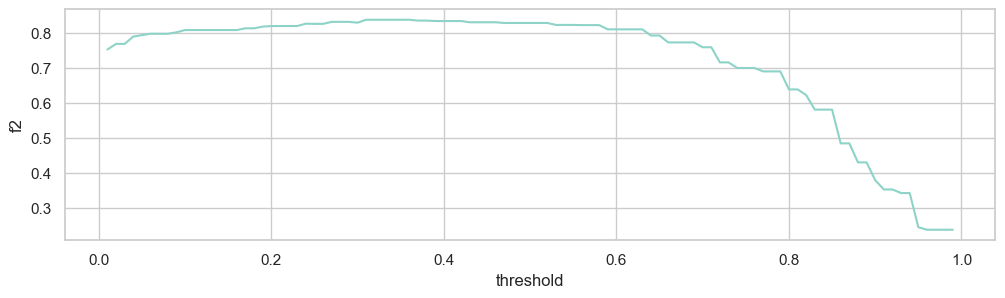

In [80]:
plt.figure(figsize=(12,3))
sns.lineplot(data=df_th, x='threshold', y='f2');

In [81]:
best_threshold = df_th.sort_values(['f2','threshold'], ascending=[False, True]).head(3).iloc[0,0]
best_threshold

0.31

In [82]:
# Modeling with Best Threshold

# pipeline
pipe_model = pipe_model = gridsearch.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]
y_pred_optimized = np.where(y_pred_proba > best_threshold, 1, 0)     # those with a probability above 0.24 enter class 1

# f1
fbeta_score(y_test, y_pred_optimized, beta=2)

0.8369979478158898

In [83]:
print(classification_report(y_test, y_pred_gridsearch))

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      1373
         1.0       0.68      0.87      0.77       627

    accuracy                           0.83      2000
   macro avg       0.81      0.84      0.82      2000
weighted avg       0.86      0.83      0.84      2000



In [55]:
# model.predict_proba(X_test)

In [84]:
# predict probabilities
y_pred_proba = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_pred_proba = y_pred_proba[:, 1]

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [85]:
df_pr_curve = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'thresholds': list(thresholds) + [0]
}).sort_values('precision', ascending=False)

df_pr_curve.head()

,precision,recall,thresholds
58,1.000000,0.000000,0.000000
55,0.917241,0.212121,0.979592
54,0.913793,0.253589,0.971429
56,0.912409,0.199362,0.995475
53,0.910615,0.259968,0.954545


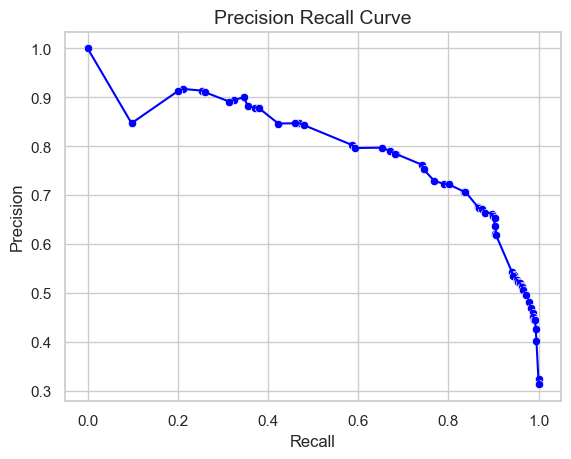

In [86]:
# Precision Recall Curve manual

sns.lineplot(data=df_pr_curve, x='recall', y='precision', color='b')
sns.scatterplot(data=df_pr_curve, x='recall', y='precision', color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve', size=14)
plt.show()

### Confusion Matrix

In [87]:
confusion_matrix(y_test, y_pred_gridsearch)

array([[1119,  254],
       [  79,  548]], dtype=int64)

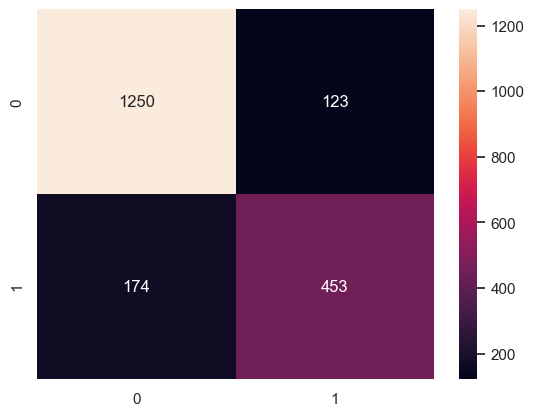

In [88]:
# Model before tuning
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='g');

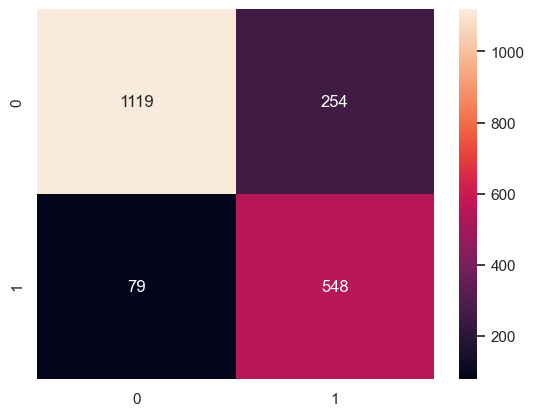

In [89]:
# Model after tuning
sns.heatmap(confusion_matrix(y_test, y_pred_gridsearch), annot=True, fmt='g');

**Insight**

- TP: 548 (predicted claim, but actually did)
- TN: 1119 (predicted no claim, but actually did)
- FP: 254 (predicted claim, but actually did not)
- FN: 79 (predicted no claim, but actually did)

**FP cost:**
- We predict that the potential customer will make a claim, which will cost the company money, even though they actually do not.
- Because we predict the potential customer will make a claim, we will charge that customer a high premium.
- As a result, there is a high probability that the potential customer will not use our insurance, and
we lose a potential customer who would have been profitable for us.

**FN cost:**
- We predict that the potential customer will NOT make a claim, which means it will NOT cost the company money, even though they actually do.
- Because we predict the potential customer will NOT make a claim, we offer them a low premium, making it more likely they will become a customer.
- As a result, we incur unexpected costs to pay the claim.